# Tugas
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
 - Metode pra pengolahan
 - Pemilihan fitur
 - Arsitektur ANN
 - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- **DIKERJAKAN SECARA BERKELOMPOK**
- **JELASKAN HASIL YANG ANDA DAPATKAN,**
 - **AKURASI**
 - **CONFUSION MATRIX**
 - **KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**

# Pra Pengolahan Data

## Langkah 1 - Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import mnist

## Langkah 2 - Load Data

In [ ]:
# Memuat data MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Langkah 3 - Pengecekan Data MINST

In [ ]:
# Menghitung jumlah data keseluruhan
total_data = len(y_train)
print(f"Jumlah data keseluruhan: {total_data}")

# Menghitung jumlah data MNIST untuk setiap label
label_counts = np.bincount(y_train)
for label, count in enumerate(label_counts):
    print(f"Jumlah data dengan label {label}: {count}")

# Menampilkan dimensi data
data_shape = x_train[0].shape
print(f"Dimensi data: {data_shape}")

Jumlah data keseluruhan: 60000
Jumlah data dengan label 0: 5923
Jumlah data dengan label 1: 6742
Jumlah data dengan label 2: 5958
Jumlah data dengan label 3: 6131
Jumlah data dengan label 4: 5842
Jumlah data dengan label 5: 5421
Jumlah data dengan label 6: 5918
Jumlah data dengan label 7: 6265
Jumlah data dengan label 8: 5851
Jumlah data dengan label 9: 5949
Dimensi data: (28, 28)


## Langkah 4 - Ekstraksi Fitur dengan PCA

In [ ]:
# Melakukan ekstraksi fitur menggunakan PCA
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train.reshape(-1, 28*28))
x_test_pca = pca.transform(x_test.reshape(-1, 28*28))

## Langkah 5 - Scaling Fitur

In [ ]:
# Melakukan penskalaan fitur
sc = StandardScaler()
x_train_pca = sc.fit_transform(x_train_pca)
x_test_pca = sc.transform(x_test_pca)

## Langkah 6 - Split Data

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_val, y_train, y_val = train_test_split(x_train_pca, y_train, test_size=0.2, random_state=0)

# Membuat Model ANN

## Langkah 1 - Inisiasi Model ANN#



In [ ]:
ann = tf.keras.models.Sequential()

## Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Langkah 3 - Membuat Hidden Layer Kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

## Langkah 4 - Membuat Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Training Model

## Langkah 1 - Compile Model

In [ ]:
# Mengompilasi model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Langkah 2 - Fitting Model

In [ ]:
# Melatih model
history = ann.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3460 - accuracy: 0.9027 - val_loss: 0.1474 - val_accuracy: 0.9555
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1229 - accuracy: 0.9639 - val_loss: 0.1084 - val_accuracy: 0.9674
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0860 - accuracy: 0.9746 - val_loss: 0.0979 - val_accuracy: 0.9688
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9804 - val_loss: 0.0930 - val_accuracy: 0.9704
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0522 - accuracy: 0.9830 - val_loss: 0.0882 - val_accuracy: 0.9733
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0963 - val_accuracy: 0.9715
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0925 - val_accuracy:

# Membuat Prediksi pada Data Testing



In [ ]:
# Membuat prediksi pada data pengujian
y_pred = np.argmax(ann.predict(x_test_pca), axis=1)

313/313 [==============================] - 1s 1ms/step


# Cek Akurasi dan Confusion Matrix

Akurasi: 0.9758


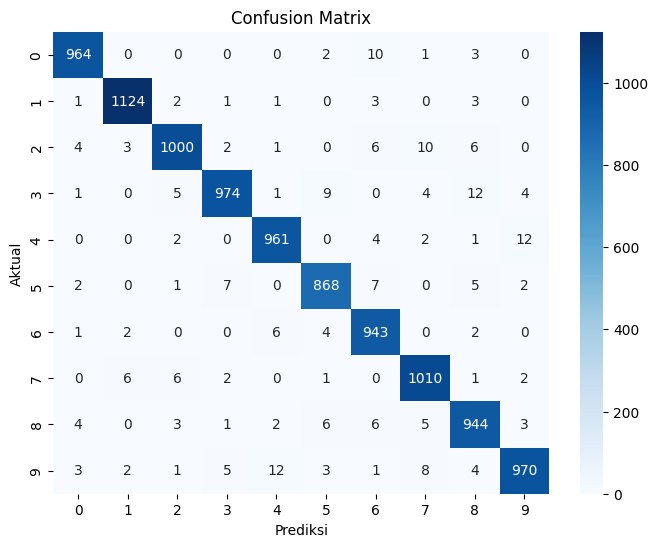

In [ ]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menampilkan confusion matrix sebagai heatmap
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()